<a href="https://colab.research.google.com/github/dasigiraghu96/Ineuron-Assignments/blob/master/Assignment_Stats_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.The marks awarded for an assignment set for a Year 8 class of 20 students were as
follows:Find mean,median,mode,standard deviation
6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8**

**

In [179]:
import numpy as np
from scipy import stats 
a=np.asarray([6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8])
def statistics(a):
  print('Mean = {}'.format(np.mean(a)))
  print('Median = {}'.format(np.median(a)))
  print('Mode = {}'.format(stats.mode(a)[0]))
  print('Standard Deviation = {}'.format(np.round(np.std(a),3)))
statistics(a)

Mean = 6.85
Median = 7.0
Mode = [7]
Standard Deviation = 1.59


**2.The number of calls from motorists per day for roadside service was recorded for a
particular month:
28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,
100, 75, 104, 97, 75,
123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109**

In [180]:
b=np.asarray([28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,100, 75, 104, 97, 75,123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109])
statistics(b)

Mean = 107.51428571428572
Median = 100.0
Mode = [75]
Standard Deviation = 38.773


**3.The number of times I go to the gym in weekdays, are given below along with its
associated probability:
x = 0, 1, 2, 3, 4, 5
f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01
Calculate the mean no. of workouts in a week. Also evaluate the variance involved in
it.**

In [181]:
import numpy as np
x=np.asarray([0,1,2,3,4,5])
f_x=np.asarray([0.09,0.15,0.40,0.25,0.10,0.01])
#Considering he goes to gym 5 days/week
x.reshape((1,-1))
f_x.reshape((-1,1))
mean=np.dot(x,f_x)
v_x=(x-mean)**2
variance=np.dot(v_x.reshape(1,-1),f_x)
print('Mean of workouts= {}'.format((mean)))
print('Variance of workouts= {}'.format(variance))


Mean of workouts= 2.15
Variance of workouts= [1.2275]


**4.Let the continuous random variable D denote the diameter of the hole drilled in an
aluminum sheet. The target diameter to be achieved is 12.5mm. Random
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF (𝑑) =
20𝑒−20(𝑑−12.5), 𝑑 ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped,
what is the proportion of those parts? What is the CDF when the diameter is of 11
mm? What is your conclusion regarding the proportion of scraps?**

In [182]:
import numpy as np
from scipy import integrate

PDF=lambda d:20*(np.exp((-20*(d-12.5))))
a=12.6
P_a=integrate.quad(PDF,12.6,np.inf) 
b=11
CDF=integrate.quad(PDF,-np.inf,b)
print('Proportion of parts need to be scrapped if d>12.6 is %.3f'%P_a[0])
print('CDF when diamter is 11mm is %.3f'%CDF[0])
print('Proportion of scraps when diameter is greater than 12.5mm is %.3f'%integrate.quad(PDF,12.5,np.inf)[0])
#it can be concluded that the function is only valid when d>=12.5. When d<12.5, the part can be reworked to 12.5 so no scrap in this case.PDF is not defined for d=11

Proportion of parts need to be scrapped if d>12.6 is 0.135
CDF when diamter is 11mm is inf
Proportion of scraps when diameter is greater than 12.5mm is 1.000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


**5.A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6
chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?
Calculate the average value of this process. Also evaluate the standard deviation
associated with it.**

x      2.000000
B_x    0.324135
Name: 2, dtype: float64


Text(0, 0.5, 'Binomial probability of fault')

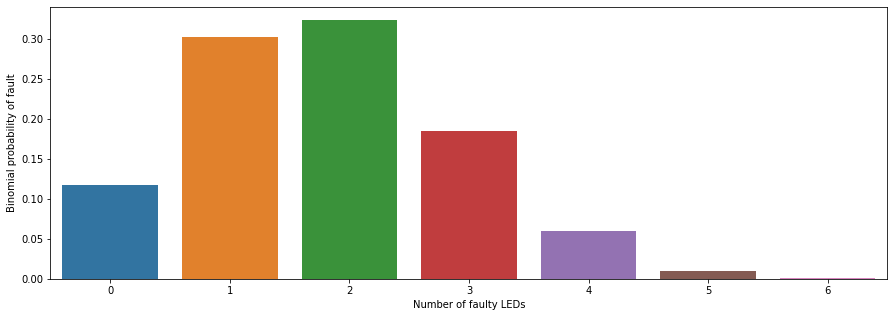

In [183]:
#bulb will glow or fail, so this is binomial problem
import scipy.special
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#required probabiity=faulty probability=p
p,q=0.3,0.7
df=pd.DataFrame({'x':[int(i) for i in range(7)],
                 'B_x':[scipy.special.comb(6,i)*(p**i)*(q**(6-i)) for i in range(7)]})
print(df.iloc[2])
plt.figure(figsize=(15,5))
sns.barplot('x','B_x',data=df)
plt.xlabel('Number of faulty LEDs')
plt.ylabel('Binomial probability of fault')

In [184]:
#mean is equal to expected value 
df['Expected value']=df['x']*df['B_x']
mean=np.round(df['Expected value'].sum())
print('mean = {}'.format(mean))
df['variance']=df['B_x']*(df['x']-mean)**2
std=np.sqrt(df['variance'].sum())
print('Standard Deviation = ',np.round(std))

mean = 2.0
Standard Deviation =  1.0


**6.Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to
solve 8 questions per day with a correction rate of 75%, while Barakha averages
around 12 questions per day with a correction rate of 45%. What is the probability
that each of them will solve 5 questions correctly? What happens in cases of 4 and 6
correct solutions? What do you infer from it? What are the two main governing
factors affecting their ability to solve questions correctly? Give a pictorial
representation of the same to validate your answer.**

In [200]:
#Gaurav- avg=,p1=0.75
#Barakha- avg=5,p2=0.45
#here both the students are independent from each other, correction rate of one doesnot effect another one 
#G(5)*B(5)
from scipy.stats import binom
import numpy as np
#to get 10 questions from both by G=5,B=5
print('Probability of each of them solving 5 questions correctly is %.3f'%(binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)))
print('Probability of each of them solving 4,6 correctly is %.3f'%(binom.pmf(4,8,0.75)*binom.pmf(6,12,0.45)))
#their correction rates effect their combined probability
#following graphs show their correction rates invidually and combined

def plotbinom(n,p,):
  fig,ax=plt.subplots(1,1)
  x = np.arange(binom.ppf(0.01, n, p),binom.ppf(0.99, n, p))
  ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
  ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

Probability of each of them solving 5 questions correctly is 0.046
Probability of each of them solving 4,6 correctly is 0.018


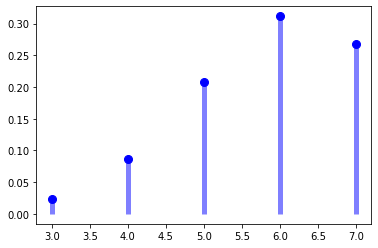

In [201]:
#Gaurav
plotbinom(8,0.75)

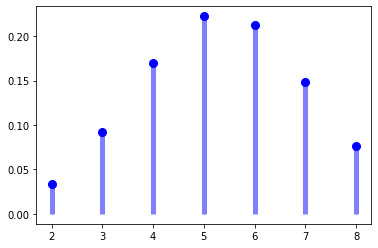

In [202]:
#Barakha
plotbinom(12,0.45)

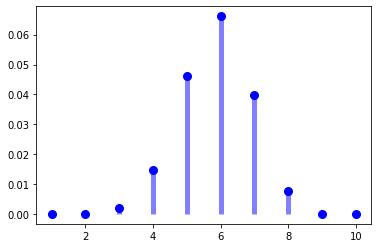

In [208]:
fig,ax=plt.subplots(1,1)
x = np.arange(1,11)
ax.plot(x, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x,8,0.75)*binom.pmf(x,12,0.45), colors='b', lw=5, alpha=0.5)
#maximum combiend probability observed at 6 questions

In [195]:
from scipy.stats import binom
binom.pmf(5,8,0.75)*binom.pmf(5,12,0.45)

0.04619989057299217

**7.Customers arrive at a rate of 72 per hour to my shop. What is the probability of 𝑘
customers arriving in 4 minutes? a) 5 customers, b) not more than 3 customers, c)
more than 3 customers. Give a pictorial representation of the same to validate your
answer.**

Probability of 5 customers arriving in 4 minutes is:  0.17474768364388296
Probaility of not more than 3 customers arriving in 4 minutes is 0.2942299164965642
Probability of more than 3 customers arriving in 4 minutes is  0.7057700835034357


Text(0, 0.5, 'Probability')

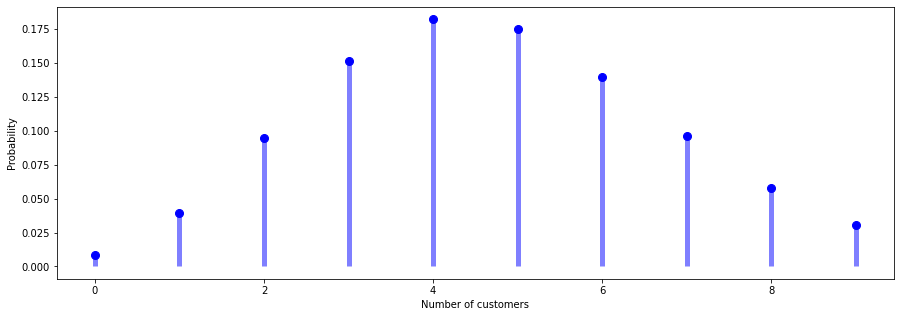

In [186]:
from scipy.stats import poisson
#We need to calculate average number of customers arriving per 4 minutes
#72/60 customers come per minute
mu=4*(72/60) # customers come per 4 minutes
print('Probability of 5 customers arriving in 4 minutes is: ',poisson.pmf(k=5,mu=mu))
print('Probaility of not more than 3 customers arriving in 4 minutes is',poisson.cdf(k=3,mu=mu))
print('Probability of more than 3 customers arriving in 4 minutes is ',1-poisson.cdf(k=3,mu=mu))
import matplotlib.pyplot as plt
x=list(range(0,10))
#plt.plot(k,poisson.pmf(k,mu=mu))
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x, poisson.pmf(x,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.xlabel('Number of customers')
plt.ylabel('Probability')

**8.I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make
reports, where I have the efficiency of entering 77 words per minute with 6 errors per
hour. What is the probability that I will commit 2 errors in a 455-word financial report?
What happens when the no. of words increases/decreases (in case of 1000 words,
255 words)?
How is the 𝜆 affected?
How does it influence the PMF?
Give a pictorial representation of the same to validate your answer.**

Probability of commiting 2 errors in 455 word financial report is: 0.09669027375144444
Probability of commiting 2 errors in 1000 word financial report is: 0.23012815007300153
Probability of commiting 2 errors in 255 word financial report is: 0.039377135392854104


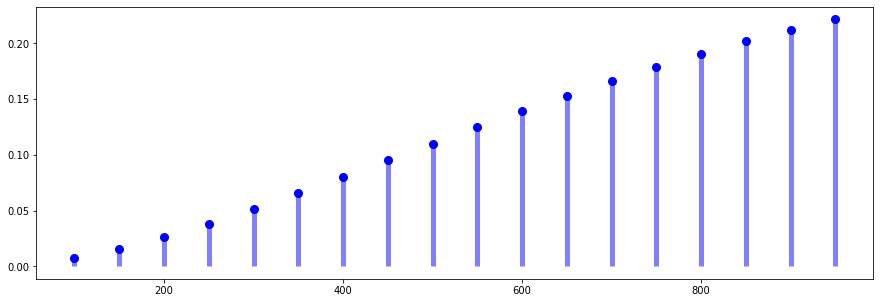

In [187]:
from scipy.stats import poisson
#Rate of entering=77 per minute
#error rate= 6/hour=0.1 per minute
#No of errors per word=0.1/77
unit_mu=0.1/77
def mu(n):
  return n*unit_mu
print('Probability of commiting 2 errors in 455 word financial report is:',poisson.pmf(2,mu=mu(455)))
print('Probability of commiting 2 errors in 1000 word financial report is:',poisson.pmf(2,mu=mu(1000)))
print('Probability of commiting 2 errors in 255 word financial report is:',poisson.pmf(2,mu=mu(255)))
x=range(100,1000,50)
mu=[i*unit_mu for i in x]
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,poisson.pmf(2,mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0, poisson.pmf(2,mu), colors='b', lw=5, alpha=0.5)
#As the number of words increase probability of getting errors increases

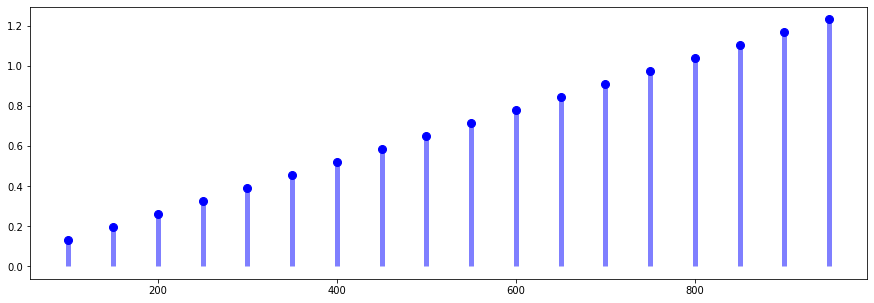

In [188]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(x,mu, 'bo', ms=8, label='poisson pmf')
ax.vlines(x,0,mu, colors='b', lw=5, alpha=0.5)
#Value of mu keeps on increasing with number of words

**9.Same as problem 4**

**10.Please compute the following:
a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)
b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05
c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99**


In [189]:
from scipy.stats import norm
def P(z,b=-np.inf) :
  #gives P(Z<=x)
  return integrate.quad(norm.pdf,b,z)[0]
print('P(Z>1.26) = %.5f'%(1-P(1.26)))
print('P(Z<-0.86) = %.5f'%P(-0.86))
print('P(Z>-1.37) = %.5f'%(1-P(-1.37)))
print('P(−1.25 < Z < 0.37) = %.5f'%P(0.37,b=-1.25))
print('P(Z ≤ −4.6) = %.5f'%P(-4.6))

P(Z>1.26) = 0.10383
P(Z<-0.86) = 0.19489
P(Z>-1.37) = 0.91466
P(−1.25 < Z < 0.37) = 0.53866
P(Z ≤ −4.6) = 0.00000


In [190]:
print('P(Z>z)=0.05 is %.2f'%(-1*norm.ppf(0.05)))
print('𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is %.2f'%(abs(norm.ppf(0.005))))

P(Z>z)=0.05 is 1.64
𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99 is 2.58


**11.The current flow in a copper wire follow a normal distribution with a mean of 10 𝑚A
and a variance of 4 (𝑚𝐴)2.
What is the probability that a current measurement will exceed 13 𝑚𝐴? What is the
probability that a current measurement is between 9 and 11mA? Determine the
current measurement which has a probability of 0.98**

In [191]:
mean=10
std=np.sqrt(4)

def I(z,b=-np.inf) :
  #gives P(Z<=x)
  z=(z-mean)/std
  return integrate.quad(norm.pdf,b,z)[0]

print('Probability that current > 13mA = %.3f'%(1-I(13)))
print('Probability that current between 9 and 11mA = %.3f'%I(11,b=9))

Probability that current > 13mA = 0.067
Probability that current between 9 and 11mA = -0.309


In [192]:
print('Current measurement which has probability of 0.98 = %.2f mA'%((norm.ppf(0.98)*std)+mean))

Current measurement which has probability of 0.98 = 14.11 mA


**12.The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch
and a standard deviation of 0.0005 inch. The specifications of the shaft are 0.2500 ∓
0.0015 inch. What proportion of shafts are in sync with the specifications? If the
process is centered so that the mean is equal to the target value of 0.2500, what
proportion of shafts conform to the new specifications? What is your conclusion from
this experiment?**

In [193]:
mean_dia=0.2508
std_dia=0.0005
#specified dia in the range of 0.2485<d<0.2515
#case-1 if mean_dia=0.2508
def I(mean,std,a,b) :
  #gives P(Z<=x)
  a=(a-mean)/std
  b=(b-mean)/std
  return integrate.quad(norm.pdf,a,b)[0]
print('Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter=%f is %f'%(0.2508,I(0.2508,0.0005,0.2485,0.2515)))
print('Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter=%f is %f'%(0.2500,I(0.2500,0.0005,0.2485,0.2515)))

Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter=0.250800 is 0.919241
Proportion of shafts with dia in range of 0.2485<d<0.2515 when mean diameter=0.250000 is 0.997300


Within the range of 0.2485<d<0.2515
A manufacturing process with mean of 0.25 gives maximum proportion of required shafts, there by reducing amount of scrap and reprocessing time.

When compared to any other manufacturing process whose mean deviates from that of 0.25 less proportion of required shafts are obtained. The more the manufucaturing process deviaties from 0.25, lesser will be the proportion of reqired safts obtained.

Mathematically, in a given range 0.2485<d<0.2515 , if there are two noraml distributrions (manufacturing processes) with same standard deviation,more area will be covered by the distribution whose mean is closer to mean of the interval i.e 0.25